In [2]:
import pandas as pd

file_path = '/content/stuntting data.csv'
data = pd.read_csv(file_path)

data.head(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age (months)                 800 non-null    int64  
 1   Height (cm)                  800 non-null    float64
 2   Weight (kg)                  800 non-null    float64
 3   BMI                          800 non-null    float64
 4   Median Height                800 non-null    float64
 5   SD Height                    800 non-null    float64
 6   HAZ                          800 non-null    float64
 7   Stunting Status              800 non-null    object 
 8   Birth Weight (kg)            800 non-null    float64
 9   Early Breastfeeding Started  800 non-null    object 
 10  Maternal Age at First Birth  800 non-null    int64  
 11  Dietary Pattern              800 non-null    object 
 12  Maternal Age                 800 non-null    int64  
 13  Paternal Age        

(   Age (months)  Height (cm)  Weight (kg)   BMI  Median Height  SD Height  \
 0            51         52.5         23.1  83.8          111.2       6.55   
 1            24         59.4         10.1  28.6           78.8       5.20   
 2            46         93.3         12.2  14.0          105.2       6.30   
 3            35         82.0          9.1  13.5           92.0       5.75   
 4            58         83.4          2.6   3.7          119.6       6.90   
 
      HAZ Stunting Status  Birth Weight (kg) Early Breastfeeding Started  \
 0 -8.962         Stunted             17.906                          No   
 1 -3.731         Stunted              7.829                          No   
 2 -1.889     Not Stunted              9.457                         Yes   
 3 -1.739     Not Stunted              7.054                         Yes   
 4 -5.246         Stunted              2.015                          No   
 
    Maternal Age at First Birth Dietary Pattern  Maternal Age  Paternal 

In [3]:
#Importing Necessary Libraries for EDA

import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-4-563fb6effdfa>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Stunting Status", loc="upper right")


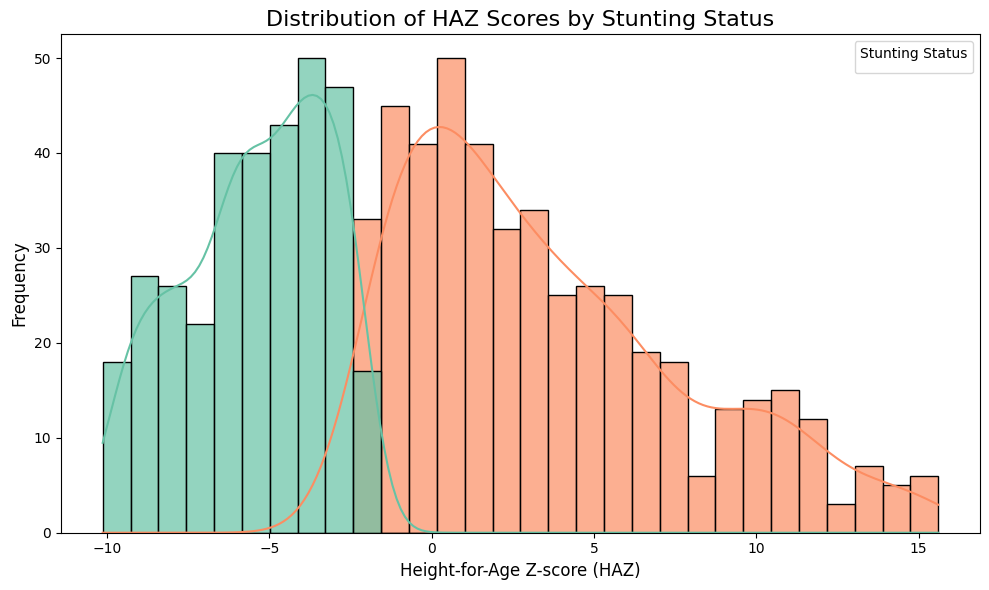

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="HAZ", hue="Stunting Status", kde=True, bins=30, palette="Set2", alpha=0.7)
plt.title("Distribution of HAZ Scores by Stunting Status", fontsize=16)
plt.xlabel("Height-for-Age Z-score (HAZ)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Stunting Status", loc="upper right")
plt.tight_layout()
plt.show()

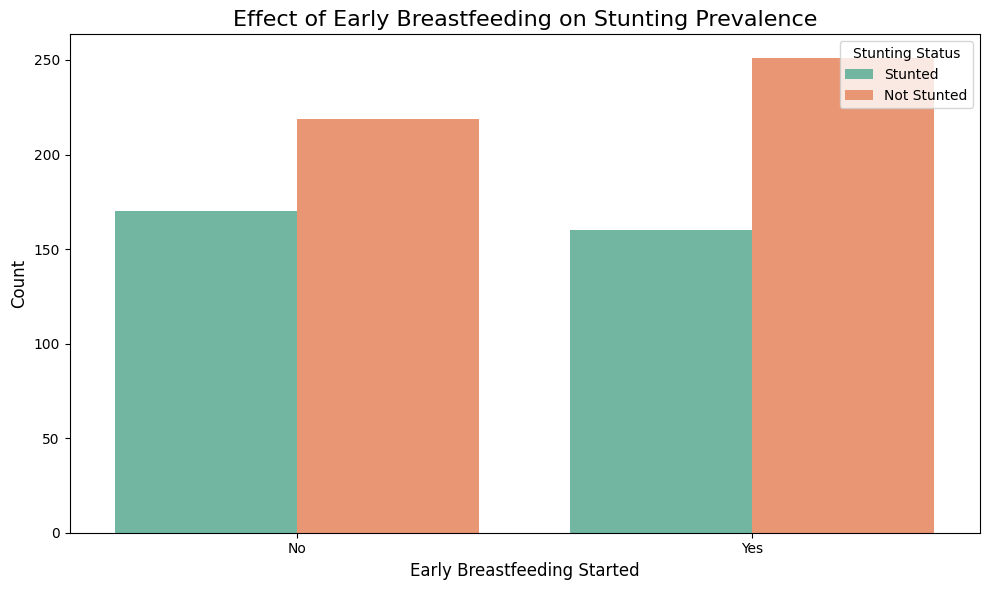

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Early Breastfeeding Started", hue="Stunting Status", palette="Set2")
plt.title("Effect of Early Breastfeeding on Stunting Prevalence", fontsize=16)
plt.xlabel("Early Breastfeeding Started", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Stunting Status", loc="upper right")
plt.tight_layout()
plt.show()


<ipython-input-22-23eb8594793e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Stunting Status", y="Birth Weight (kg)", palette="Set2")
<ipython-input-22-23eb8594793e>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Stunting Status", loc="upper right")


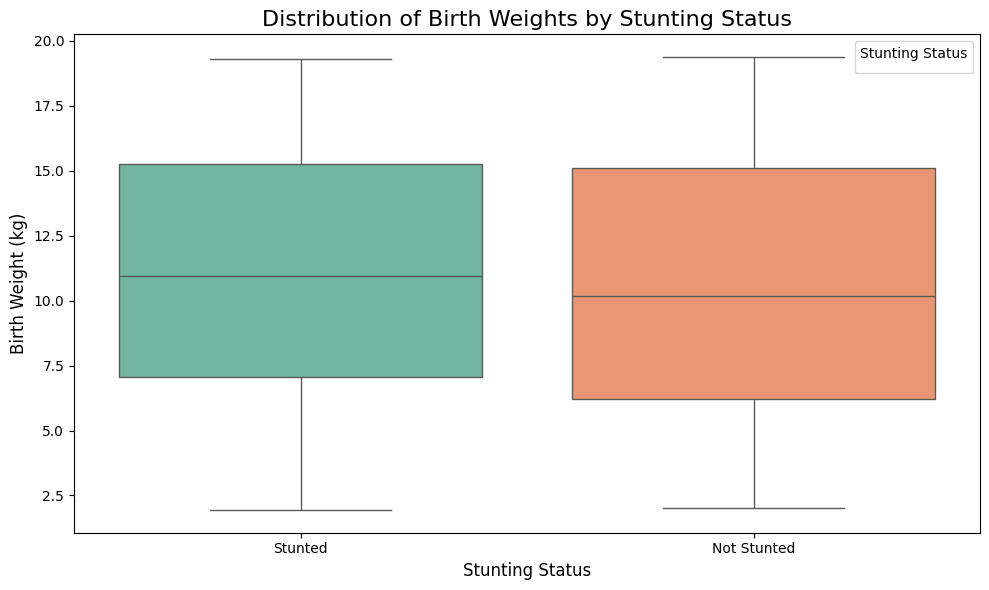

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Stunting Status", y="Birth Weight (kg)", palette="Set2")
plt.title("Distribution of Birth Weights by Stunting Status", fontsize=16)
plt.xlabel("Stunting Status", fontsize=12)
plt.ylabel("Birth Weight (kg)", fontsize=12)
plt.legend(title="Stunting Status", loc="upper right")
plt.tight_layout()
plt.show()


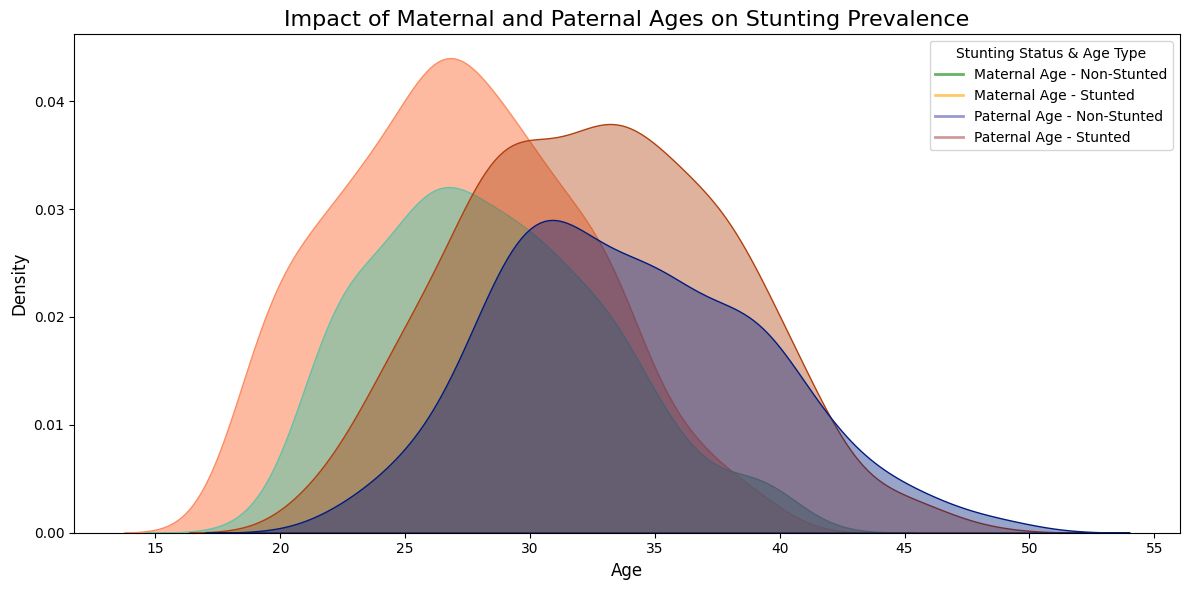

In [10]:
plt.figure(figsize=(12, 6))

# KDE plot for Maternal Age
sns.kdeplot(
    data=data,
    x="Maternal Age",
    hue="Stunting Status",
    fill=True,
    palette="Set2",
    alpha=0.6,
    label=None
)

# KDE plot for Paternal Age
sns.kdeplot(
    data=data,
    x="Paternal Age",
    hue="Stunting Status",
    fill=True,
    palette="dark",
    alpha=0.4,
    label=None
)

# Adding labels of Stunted or Non Stunted Specifically
from matplotlib.lines import Line2D
handles = [
    Line2D([0], [0], color="green", lw=2, alpha=0.6, label="Maternal Age - Non-Stunted"),
    Line2D([0], [0], color="orange", lw=2, alpha=0.6, label="Maternal Age - Stunted"),
    Line2D([0], [0], color="darkblue", lw=2, alpha=0.4, label="Paternal Age - Non-Stunted"),
    Line2D([0], [0], color="darkred", lw=2, alpha=0.4, label="Paternal Age - Stunted"),
]

plt.legend(handles=handles, title="Stunting Status & Age Type", loc="upper right")

# Titles and labels
plt.title("Impact of Maternal and Paternal Ages on Stunting Prevalence", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()


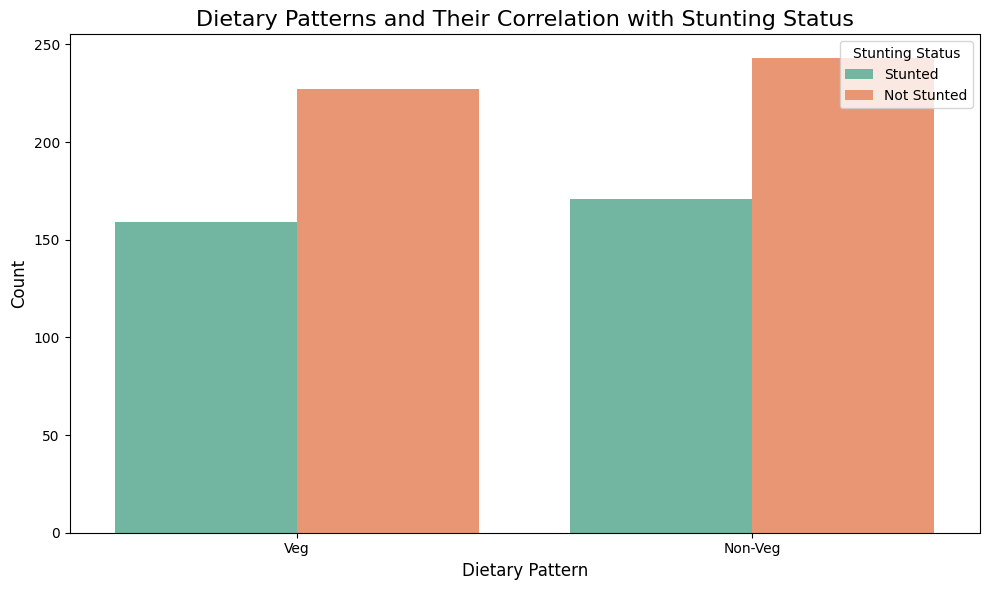

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Dietary Pattern", hue="Stunting Status", palette="Set2")
plt.title("Dietary Patterns and Their Correlation with Stunting Status", fontsize=16)
plt.xlabel("Dietary Pattern", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Stunting Status", loc="upper right")
plt.tight_layout()
plt.show()


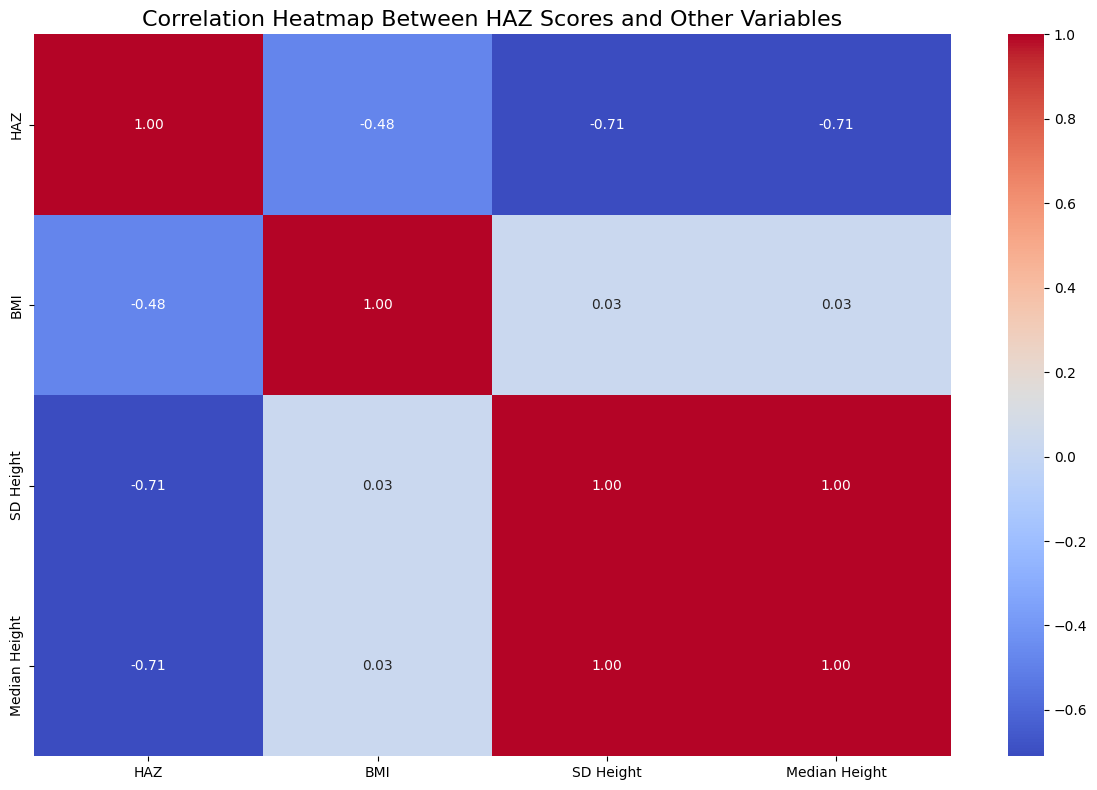

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[["HAZ", "BMI", "SD Height", "Median Height"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap Between HAZ Scores and Other Variables", fontsize=16)
plt.tight_layout()
plt.show()


Unique values in 'Stunting Status': ['Stunted' 'Not Stunted']


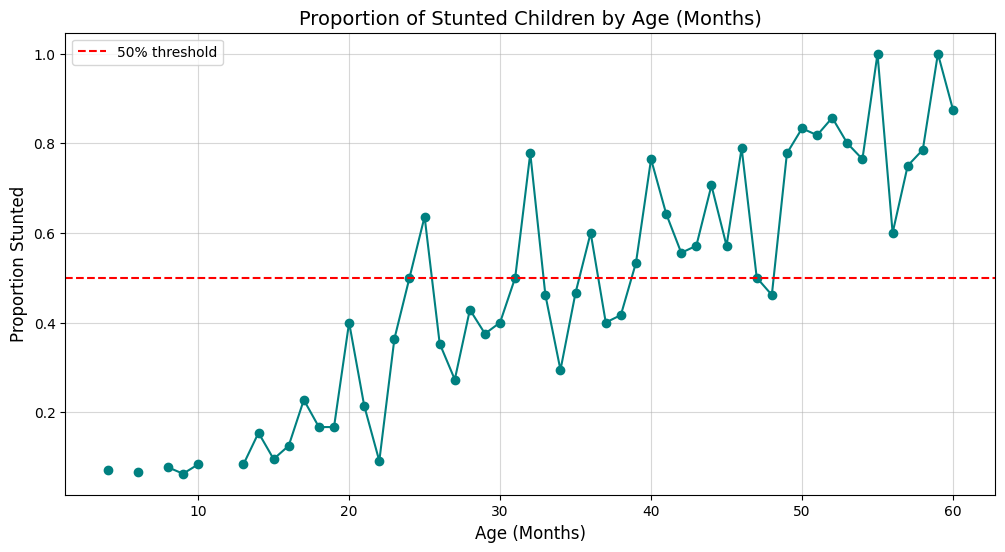

'Dots (Markers): Represent the proportion of stunted children at each age in months. Each dot corresponds to a specific age group, showing the calculated percentage of children who are stunted for that age.\nLines (Connecting the Dots): The line connects these dots to visualize the trend of stunting across different ages. This shows how the proportion of stunted children changes as the child grows older.\nRed Dashed Line (50% threshold): This line marks the 50% threshold, indicating the age point where the proportion of stunted children is at or above half. It can help identify which age groups have more than 50% of children stunted.'

In [21]:
import matplotlib.pyplot as plt

# Check the unique values in 'Stunting Status'
unique_values = data['Stunting Status'].unique()
print("Unique values in 'Stunting Status':", unique_values)

# Adjust the label for 'Stunted'
stunted_label = 'Stunted'  # Use the correct label for stunted children

# Group by Age (Months) and calculate the proportion of stunted children
age_groups = data.groupby('Age (months)')['Stunting Status'].value_counts(normalize=True).unstack()

# Check if the label exists in the data
if stunted_label in age_groups.columns:
    stunted_proportion = age_groups[stunted_label]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(stunted_proportion.index, stunted_proportion.values, marker='o', linestyle='-', color='teal')
    plt.axhline(y=0.5, color='red', linestyle='--', label='50% threshold')
    plt.title('Proportion of Stunted Children by Age (Months)', fontsize=14)
    plt.xlabel('Age (Months)', fontsize=12)
    plt.ylabel('Proportion Stunted', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()
else:
    print(f"Label '{stunted_label}' not found in the 'Stunting Status' column.")


"""Dots (Markers): Represent the proportion of stunted children at each age in months. Each dot corresponds to a specific age group, showing the calculated percentage of children who are stunted for that age.
Lines (Connecting the Dots): The line connects these dots to visualize the trend of stunting across different ages. This shows how the proportion of stunted children changes as the child grows older.
Red Dashed Line (50% threshold): This line marks the 50% threshold, indicating the age point where the proportion of stunted children is at or above half. It can help identify which age groups have more than 50% of children stunted."""


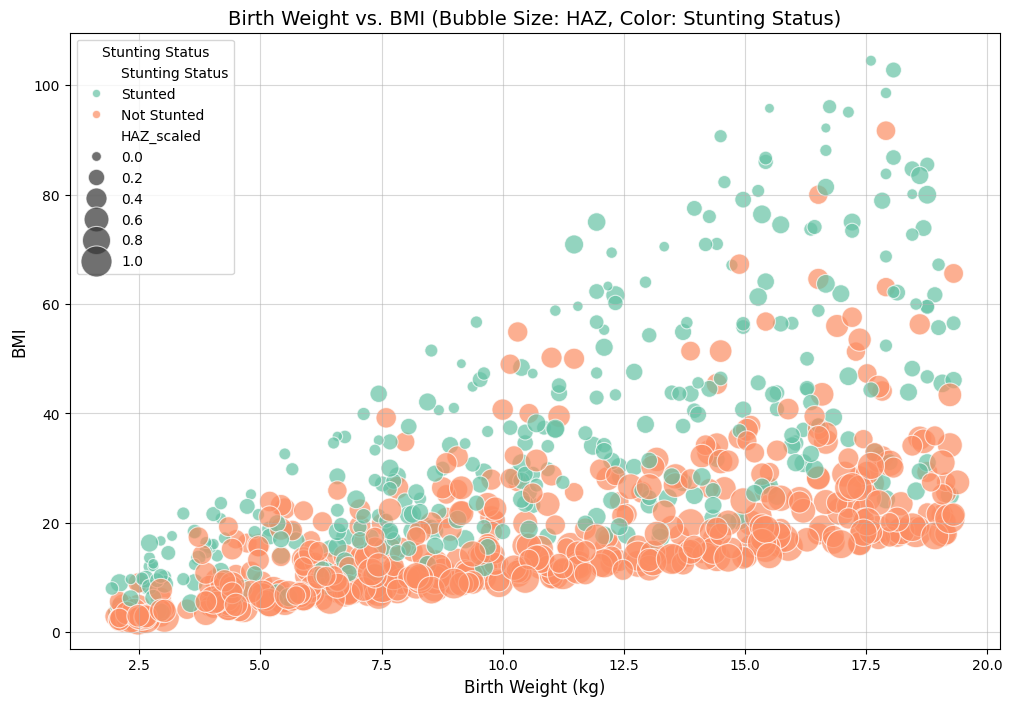

"The size of each bubble corresponds to the HAZ score: larger bubbles represent a higher HAZ score.\nThe color indicates Stunting Status (e.g., stunted vs. not stunted).\nThis visualization helps identify patterns or clusters in the data based on birth weight, BMI, and stunting status, while also accounting for the child's growth status (HAZ)."

In [16]:

data['HAZ_scaled'] = (data['HAZ'] - data['HAZ'].min()) / (data['HAZ'].max() - data['HAZ'].min())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='Birth Weight (kg)',
    y='BMI',
    size='HAZ_scaled',
    hue='Stunting Status',
    palette='Set2',
    alpha=0.7,
    sizes=(50, 500),
)
plt.title('Birth Weight vs. BMI (Bubble Size: HAZ, Color: Stunting Status)', fontsize=14)
plt.xlabel('Birth Weight (kg)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Stunting Status')
plt.grid(alpha=0.5)
plt.show()
"""The size of each bubble corresponds to the HAZ score: larger bubbles represent a higher HAZ score.
The color indicates Stunting Status (e.g., stunted vs. not stunted).
This visualization helps identify patterns or clusters in the data based on birth weight, BMI, and stunting status, while also accounting for the child's growth status (HAZ)."""

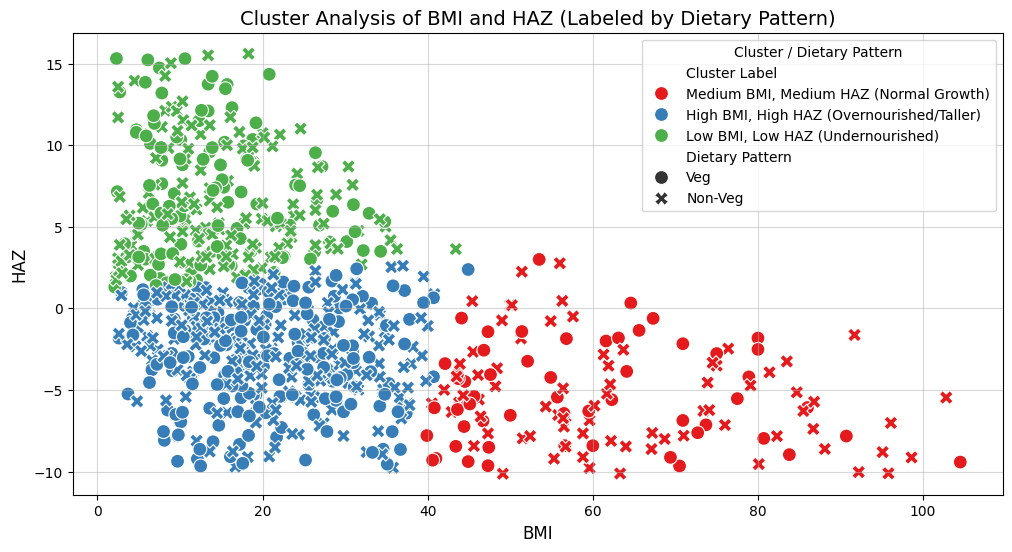

'The points are color-coded according to the cluster assignment made by the KMeans algorithm (3 clusters in total).\nThe style of the points indicates different dietary patterns.\nThe legend shows the clusters and dietary patterns for better understanding of the data distribution.'

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the BMI and HAZ columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['BMI', 'HAZ']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Map cluster numbers to meaningful descriptions
cluster_labels = {
    0: 'Low BMI, Low HAZ (Undernourished)',
    1: 'Medium BMI, Medium HAZ (Normal Growth)',
    2: 'High BMI, High HAZ (Overnourished/Taller)'
}
data['Cluster Label'] = data['Cluster'].map(cluster_labels)

# Plot with customized legend
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=data,
    x='BMI',
    y='HAZ',
    hue='Cluster Label',  # Use descriptive labels
    style='Dietary Pattern',
    palette='Set1',
    s=100
)

# Customize legend
plt.title('Cluster Analysis of BMI and HAZ (Labeled by Dietary Pattern)', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('HAZ', fontsize=12)
plt.legend(title='Cluster / Dietary Pattern', loc='best', fontsize=10)
plt.grid(alpha=0.5)
plt.show()
"""The points are color-coded according to the cluster assignment made by the KMeans algorithm (3 clusters in total).
The style of the points indicates different dietary patterns.
The legend shows the clusters and dietary patterns for better understanding of the data distribution."""


<ipython-input-23-3ee8ca8ee675>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Early Breastfeeding Started', 'Birth Weight Category'])['Stunting Status']


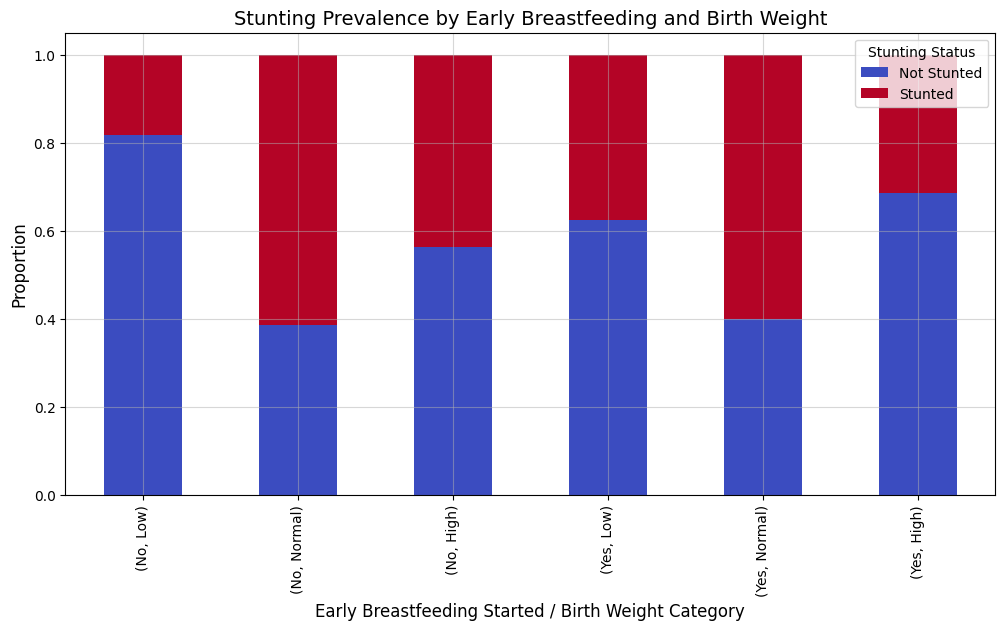

'X-axis: Groups by early breastfeeding and birth weight category (Low, Normal, High).\nY-axis: Represents the proportion of each stunting status (Stunted/Not Stunted).\nStacks: Each bar is divided into colored sections showing the proportion of stunted vs non-stunted children.'

In [23]:
# Categorizing Birth Weight
data['Birth Weight Category'] = pd.cut(data['Birth Weight (kg)'], bins=[0, 2.5, 3.5, 5], labels=['Low', 'Normal', 'High'])

# Group by Early Breastfeeding and Birth Weight
# Compute normalized value counts for Stunting Status
breastfeeding_groups = (
    data.groupby(['Early Breastfeeding Started', 'Birth Weight Category'])['Stunting Status']
    .value_counts(normalize=True)
    .unstack(level=-1)  # Ensure Stunting Status becomes columns
)

# Plotting Stunting Proportion
breastfeeding_groups.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Stunting Prevalence by Early Breastfeeding and Birth Weight', fontsize=14)
plt.xlabel('Early Breastfeeding Started / Birth Weight Category', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Stunting Status')
plt.grid(alpha=0.5)
plt.show()
"""X-axis: Groups by early breastfeeding and birth weight category (Low, Normal, High).
Y-axis: Represents the proportion of each stunting status (Stunted/Not Stunted).
Stacks: Each bar is divided into colored sections showing the proportion of stunted vs non-stunted children."""
